## Exercise 7:


_course: quantum cryptography for beginners
<br>date: 29 october 2020
<br>author: burton rosenberg_

###  The CHSH Experiment

The experiment is named after John Clauser, Michael Horne, Abner Shimony, and Richard Holt, and was proposed in 1969. It verifies Bell's Theorem, proposed by John Bell in 1964. Bell was responding the the criticisms that were made by Albert Einstein, Boris Podolsky and Nathan Rosen in 1935 about the notion of an entagled pair &mdash; the pair we call the EPR and which has been with us from the very first day of the course.

Their criticism was: How can it be, if an EPR is created then separated by light years, that the measurement of one qubit of the pair will instanteously determine the state of the other qubit in the pair? 

They proposed that in some manner, not just the pair, but all measurement outcomes, were encoded into the pair when it was created. This is called the _hidden variable proposition_, because it states that the outcome is the discovery of some already determined fact &mdash; this hidden variable. Bell provided an equality that showed them wrong. 

This developed into a sort of game, that can be played classically, and with an EPR pair, and quantum measurements. And the result with quantum shows an advantage in the game that is not possible classically. Like it or not, something is learned "faster than the speed of light" between the two pairs. 



### The game

Alice and Bob never cease to play games. They are the "it" couple for all of crypto, and seems like they now play quantum physics games.

Alice and Bob each have a machine with a button that flips a coin and two lights, red and green, sitting on top of the box. Inside the box is a computer, which can be quantum or classical, and one half of an EPR pair.

<pre>

      (R)  (G)                       (R)  (G)
       |    |                         |    |
    +----------+                   +----------+
    |   [0/1] ===|   &lt;-- * --&gt;   |=== [0/1]   |
    |          |                   |          |
    |   |&phi;&gt;    |                   |   |&phi;&gt;    |
    +----------+                   +----------+
       Alice                           Bob
</pre>

A laser beam is lauched towards the two buttons from the midpoint location between the boxes and pushes each of the buttons at the same moment. Relativistic notions apply, but we are in the stationary frame of refernce, so the buttons seem to us to be simultaneous. The computer, whether quantum or classical, deterministic or randomized, must make a fast decision once the button is pressed to light either the red or green light.

Then we score the game this way,


| Alice's coin | Bob's coin | Lights |
|:-:|:-:|:- |
| 0 | 0 | same color |
| 1 | 0 | same color |
| 0 | 1 | same color |
| 1 | 1 | different colors |

That is, Alice and Bob are trying to coordinate their lights, and what is stopping them from doing it perfectly is the case where both have flipped a 1. To coordinate strategies perfectly, Alice and Bob need to know the other coin, but this does not seem possible, as they are too far apart to communicate within the time allowance to light their lights.




### Classical computation

We will consider the mechanism that lights to the light to be by a computation on either a classical or quantum computer. Classicial computation can be deterministic, or randomized. And the randomized computation can use either the private coin of the public coin model. Each model is strictly more powerful then the next, in this order, 

$$
\mbox{Deterministic}\;\longrightarrow  \mbox{Random private coin}\;\longrightarrow  \mbox{Random public coin}
$$

A deterministic computation is a function $\cal{A}(x)$. A randomized algorithm takes an additional string, $\omega$ choosen for that run of the computation, and the correctness is probablistic, $\cal{A}(\omega,x)$.

If Alice and Bob are given different and independent $\omega$ this is the private coin model. If they are given the same $\omega$ that is the public (or common) coin model.

Randomized is strictly more powerful than deterministic, because the algorithm could ignore $\omega$. And public is more powerful that private, because Alice and Bob collude. They can decide to break $\omega$ into three parts, and their algorithms one each differnt of two of the parts, and collectively the third, 

$$
\omega = \omega_1 \circ \omega_2 \circ \omega_3 \quad \cal{A}(\omega_1,\omega_3,x),\;\cal{B}(\omega_2, \omega_3,x)
$$

Where the circle-dot is some mixing function, for instance, fold the three strings into one by taking bits in a circular pattern.

The public randomness can be implemented by firing a stream of photons from the location where the start beam originates. The bits will arrive delayed, but at the same time, and the stream can be started hours before, so that there is a stream of random bits arriving during the time window that the algorithm must run. Timing marks in the stream will allow Alice and Bob to synchronize the stream.

#### Deterministic

Alice and Bob's deterministic algorithms, $\cal{A}(x), \cal{B}(x)$ assign a color, red or green, to a coin flip, zero or one. Working through the possibilies, they can do no better than the assign a constant value, red or green, winning the game on all cases except when both flip one. Hence the win with probability 3/4.

Alice or Bob might have a variant strategy on input one, but any gain in one case is offset by a loss in another.

#### Randomized

Randomized stratigies can do no better. All classical stratigies with the game with probabiliy at best 3/4.



### Exercise A:

State two randomized stratagies that seem hopeful to break the 3/4 bound; code them and see what happens.


In [33]:
import random

def alice_strategy0(priv_random, public_random, coin_flip):
    """
    alice stratagy. 
    takes some random values, separated into random bits private to alice
    and in common with bob, and the coin flip
    
    returns "red" or "green"
    
    i take the easy case. she always answers red
    """
    if(priv_random == public_random):
        return "green"
    else:
        return "red"

def bob_strategy0(priv_random, public_random, coin_flip):
    """
    bob stratagy.     
    takes some random values, separated into random bits private to bob
    and in common with alice, and the coin flip
    
    returns "red" or "green"
    
    i take the easy case. he always answers red
    """
    
    if(priv_random == public_random):
        return "green"
    else:
        return "red"

def score(alice_function, bob_function,trials=1000,verbose=False):
    """
    scoring the responses
    """
    k = 4
    alice_random = [random.randint(0,1) for i in range(k)]
    bob_random = [random.randint(0,1) for i in range(k)]
    common_random = [random.randint(0,1) for i in range(k)]
    if verbose: print(alice_random,bob_random,common_random)
        
    correctly = 0 
    for t in range(trials):
        alice_coin = random.randint(0,1)
        bob_coin = random.randint(0,1)
        alice_light = alice_function(alice_random, common_random, alice_coin)
        bob_light = bob_function(bob_random, common_random, bob_coin)
        if alice_coin*bob_coin == 0:
            if alice_light == bob_light :
                correctly += 1
        else:
            if alice_light != bob_light :
                correctly += 1
        if verbose: print(f'alice: {alice_coin} bob:{bob_coin} alice_light: {alice_light} bob_light: {bob_light}')
    return correctly/trials
    

score(alice_strategy0,bob_strategy0,trials=36,verbose=True)

#score(alice_strategy1,bob_strategy1,trials=36,verbose=True)
#score(alice_strategy2,bob_strategy2,trials=36,verbose=True)


[0, 0, 1, 0] [1, 0, 0, 1] [0, 1, 1, 1]
alice: 0 bob:1 alice_light: red bob_light: red
alice: 0 bob:1 alice_light: red bob_light: red
alice: 1 bob:0 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 0 bob:1 alice_light: red bob_light: red
alice: 0 bob:0 alice_light: red bob_light: red
alice: 0 bob:0 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:0 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:0 alice_light: red bob_light: red
alice: 1 bob:1 alice_light: red bob_light: red
alice: 1 bob:0 alice_light: red bob_light: red
alice: 1 bob:0 alice_light: red bob_light: red
alice: 0 bob:1 alice_light: red bob_light: red
alice: 0 bob:0 alice_

0.6111111111111112


### Quantum computation

Alice and Bob can run a quantum algorith, and have the halfs of an EPR pair.

Our first experiment confirms the following. That with an EPR pair, whatever is measured by one qubit, the other qubit collapses to the same state.

We have already thought about the epr pair $|00\rangle+|11\rangle$ when the first (or second) qubit is measured, and it is $b$, zero or one, then the secone qubit will measure $b$ with certainty. 

However if the first qubit (or second qubit) is measured in the $|+\rangle, |-\rangle$ basis, and measuress $b$, so will the second. In this case $b=0$ would mean both qubits are in the  $|+\rangle$; $b=1$ would mean both qubits end in the $|-\rangle$ state.

We perform the following experiment, using an Hadamard in front of the measure to measure in the X basis, and find that the only possibilities are agreement in measurements.

The CHSH uses Alice's choice of measuring in the X or the Z to communicate to Bob the result of her coin flip. The clever part is how Bob can harvest that communication. 



In [34]:
import qiskit
import time, math

from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.jobstatus import JOB_FINAL_STATES, JobStatus
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

qiskit.__qiskit_version__

args_g = []

# your api token from IBM, first time run.
# after that None is good

#api_token = 'abcdefghijklmnopqrstuvwxyz'
api_token = None 

def load_or_save_IBMQ_account(api_token=None):
    global args_g
    if api_token: 
    # only needs to be done once
        # then is stored in e.g. ~/.qistkit/qiskitrc
        IBMQ.save_account(api_token)
    provider = IBMQ.load_account()
# choose an alternative provider, if available
    provider = IBMQ.providers()[1]
    return provider

def list_backends(provider):
    global args_g
    backends = provider.backends()
    print('backends available:')
    for be in backends:
        st = be.status()
        if st.operational:
            print(f'\t{be.name()}, pending jobs:{st.pending_jobs}')

            
def run_quantum_circuit_on_backend(quantum_circuit,provider,backend):
    backend = provider.get_backend(backend)
    qobj = assemble(transpile(quantum_circuit, backend=backend), backend=backend)
    job = backend.run(qobj)
    return job


def wait_for_job(backend, job, wait_interval=5):
    backend = provider.get_backend(backend)
    retrieved_job = backend.retrieve_job(job.job_id())
    start_time = time.time()
    job_status = job.status()
    while job_status not in JOB_FINAL_STATES:
        print(f'Status @ {time.time() - start_time:0.0f} s: {job_status.name},'
              f' est. queue position: {job.queue_position()}')
        time.sleep(wait_interval)
        job_status = job.status()


print("listing backends ...")
provider = load_or_save_IBMQ_account(api_token)
list_backends(provider)

# choose your backend

#backend = 'ibmq_qasm_simulator'
#backend = 'ibmq_armonk'
#backend = 'ibmq_vigo'
#backend = 'ibmq_london'
#backend = 'ibmq_ourense'
#backend = 'ibmq_bogota'

# and so forth ... chose from the results given by provider.backends()

listing backends ...


ibmqfactory.load_account:WARNING:2020-11-09 15:19:50,674: Credentials are already in use. The existing account in the session will be replaced.


backends available:
	ibmq_qasm_simulator, pending jobs:1
	ibmqx2, pending jobs:767
	ibmq_16_melbourne, pending jobs:737
	ibmq_vigo, pending jobs:880
	ibmq_ourense, pending jobs:894
	ibmq_valencia, pending jobs:295
	ibmq_armonk, pending jobs:7
	ibmq_athens, pending jobs:29
	ibmq_rome, pending jobs:4
	ibmq_santiago, pending jobs:32
	ibmq_bogota, pending jobs:7
	ibmq_casablanca, pending jobs:10


In [35]:
backend = 'ibmq_qasm_simulator'
#backend = 'ibmq_vigo'
backend_obj = provider.get_backend(backend)
backend_obj

<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='univ-miami-Rose', project='Quantum-Cryptogr')>

In [36]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

def create_epr_pair():
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[1])
    return (circuit,qreg_q,creg_c)

def measure_z_basis(circuit_regs):
    circuit, qreg_q, creg_c = circuit_regs
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    return (circuit,qreg_q,creg_c)

def measure_x_basis(circuit_regs):
    circuit, qreg_q, creg_c = circuit_regs
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    return (circuit,qreg_q,creg_c)

def run(circuit_regs):
    circuit, qreg_q, creg_c = circuit_regs
    print('\n-------- CIRCUIT ---------')
    print(circuit.draw(output='text'))
    print('-------------------------\n')
    
    job = run_quantum_circuit_on_backend(circuit,provider,backend)
    print(f'results: waiting for results from backend {backend} ...')
    wait_for_job(backend, job)
    result = job.result()
    print(f'results: {result.get_counts()}')
    return result.get_counts()

    
epr_source = create_epr_pair()
alice_and_bob_measure_z =  measure_z_basis(epr_source)
run(alice_and_bob_measure_z)

epr_source = create_epr_pair()
alice_and_bob_measure_x =  measure_x_basis(epr_source)
run(alice_and_bob_measure_x)


  



-------- CIRCUIT ---------
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
-------------------------

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'00': 507, '11': 517}

-------- CIRCUIT ---------
     ┌───┐     ┌───┐┌─┐   
q_0: ┤ H ├──■──┤ H ├┤M├───
     └───┘┌─┴─┐├───┤└╥┘┌─┐
q_1: ─────┤ X ├┤ H ├─╫─┤M├
          └───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
-------------------------

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'00': 493, '11': 531}


{'00': 493, '11': 531}

### Measuring at &pi;/8

To harvest Alice's measurement decision, to measure either in the X or Z basis, requires Bob to measure in two other basis, 45 degrees apart, but bisecting the angle of Alice's measurements.

<pre>
                                    Alice 1
          | Alice 1                |
Bob 1 |   |                        |   | Bob 1
       |  |                        |  |
        | |      __--- Bob 0       | |
         || _---                   ||
          +---------   Alice 0     +---------   Alice 0   
                                    --___
                                          --___ Bob 0

           Alice 0, Bob pi/8        Alice 0, Bob -pi/8
</pre>

Similar diagram can be drawn but this time Alice measures at pi/4 (45 degrees).

The result is that in the diagram shown above, Bob and Alice tend to agree on the outcome. Alice places the qubit in either 0 or 1 in the Z basis, and Bob, although not prefectly correlated, has probability $\cos^2(\pi/8) = 0.85$ of given the same result.

### Exercise B:

Draw (better on paper and then scan it in) the case where Alice measures at $pi/4$, or 45 degrees, and Bob measures at $pi/8$ and $-pi/8$, and draw a conclusion that again Alice and Bob have correlated measures with probabiliy 0.85. However in this case, one correlation is positive (agreeement) the other is negative (disagreement).

This is the what the CHSH game will exploit for the win.



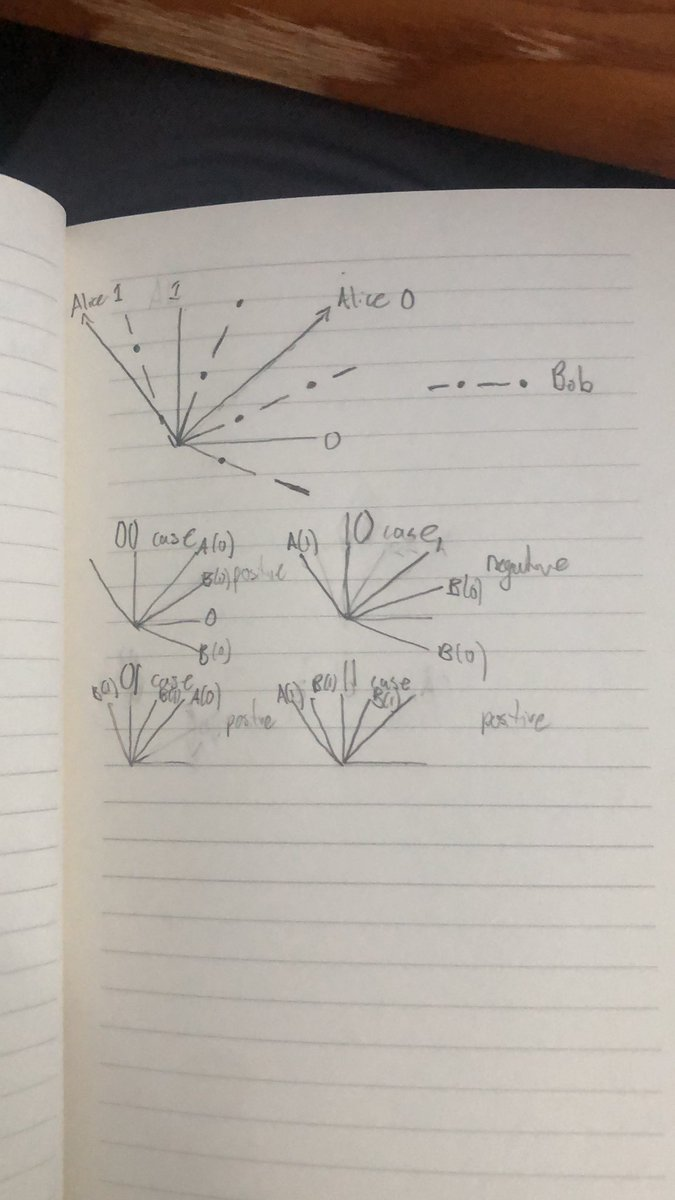

### Exercise C: 

We do the four experiments. The case of Alice 0, Bob $pi/8$ is done. Do the code for the other cases and check that we have predicted the quantum behavior accurately.

Use the simulator to debug. You can use Vigo to run this on a real hardware. Vigo is only 5 qubits, so it is less busy that the newer IBM quantum computers.

In [37]:

def alice_bob_agreement(results):
    agree = results['00'] + results['11']
    disagree = results['10'] + results['01']
    return (agree/(agree+disagree))

def run_epr(alice,bob,measurement):
    epr_source = create_epr_pair()
    circuit =  measurement(epr_source)
    results = run(circuit)
    print("\n*** alice measures "+alice+", bob measures "+bob)
    print("*** agree",alice_bob_agreement(results))

    
def measure_alice_0_bob_22(circuit_regs):  
    """
    alice measures on the 0, and bob measures at pi/8
    """
    circuit, qreg_q, creg_c = circuit_regs
    circuit.ry(pi/4, qreg_q[1])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    return (circuit,qreg_q,creg_c)

def measure_alice_0_bob_m22(circuit_regs):  
    """
    alice measures on the 0, and bob measures at -pi/8
    """
    circuit, qreg_q, creg_c = circuit_regs
    
    
    circuit.ry(-pi/4, qreg_q[1])


    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    return (circuit,qreg_q,creg_c)

def measure_alice_45_bob_22(circuit_regs):  
    """
    alice measures on the pi/4, and bob measures at pi/8
    """
    circuit, qreg_q, creg_c = circuit_regs

    circuit.h(qreg_q[0])
    circuit.ry(pi/4, qreg_q[1])


    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    return (circuit,qreg_q,creg_c)

def measure_alice_45_bob_m22(circuit_regs): 
    """
    alice measures on the pi/4, and bob measures at -pi/8
    """
    circuit, qreg_q, creg_c = circuit_regs
    
    
    circuit.h(qreg_q[0])
    circuit.ry(-pi/4, qreg_q[1])

    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[1])
    return (circuit,qreg_q,creg_c)

run_epr("0","pi/8",measure_alice_0_bob_22) 
run_epr("0","-pi/8",measure_alice_0_bob_m22) 
run_epr("pi/4","-pi/8",measure_alice_45_bob_m22) 
run_epr("pi/4","pi/8",measure_alice_45_bob_22) 



-------- CIRCUIT ---------
     ┌───┐                 ┌─┐   
q_0: ┤ H ├──■──────────────┤M├───
     └───┘┌─┴─┐┌──────────┐└╥┘┌─┐
q_1: ─────┤ X ├┤ RY(pi/4) ├─╫─┤M├
          └───┘└──────────┘ ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1 
-------------------------

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'00': 419, '01': 67, '10': 78, '11': 460}

*** alice measures 0, bob measures pi/8
*** agree 0.8583984375

-------- CIRCUIT ---------
     ┌───┐                  ┌─┐   
q_0: ┤ H ├──■───────────────┤M├───
     └───┘┌─┴─┐┌───────────┐└╥┘┌─┐
q_1: ─────┤ X ├┤ RY(-pi/4) ├─╫─┤M├
          └───┘└───────────┘ ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1 
-------------------------

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'00': 423, '01': 73, '10': 71, '11': 457}

**

### Exercise D: Finishing the game

You now have all the methods necessary to finish the game. Write the code that wins the CHSH game with probability 0.85.


In [38]:

def score_q(alice_coin, bob_coin, alice_color, bob_color):
    """
    return true if the game was won, else false. the game is won if 
    alice and bob agree on colors for all coins except when both are
    1; they the game is won if they disagree on colors
    """
    
    if (alice_coin * bob_coin) != 0:
        return alice_color != bob_color
    else:
        return alice_color == bob_color
    



def alice_q(quantum_result, coin):
    """
    given the result of the measurement on the epr pair, "0" or '1',
    and the coin, alice decides to return "green" or "red"
    """
    color = 'green'
    
    
    if(quantum_result == '0'):
        color = 'red'


    return color


def bob_q(quantum_result, coin):
    """
    given the result of the measurement on the epr pair, "0" or '1',
    and the coin, bob decides to return "green" or "red"
    """
    color = 'green'
    
    
    if(quantum_result == '0'):
        color = 'red'


    return color

def chsh_game(trials=10,verbose=False):
    alice_bob_measure = {'00':measure_alice_0_bob_22,
                         '01':measure_alice_0_bob_m22,
                         '10':measure_alice_45_bob_m22, 
                         '11':measure_alice_45_bob_22}
    
    wins = 0
    games = 0

    for i in range(trials):
        alice_coin = random.randint(0,1)
        bob_coin = random.randint(0,1)
        measure = alice_bob_measure[str(alice_coin)+str(bob_coin)]
        
        epr_source = create_epr_pair()
        circuit = measure(epr_source)
        results = run(circuit)

        for k in results:
            alice_color = alice_q(k[0],alice_coin)
            bob_color = bob_q(k[1],bob_coin)
            
            
            win_p = score_q(alice_coin, bob_coin, alice_color, bob_color)
            if win_p:
                wins += results[k]
                
            games += results[k]

        if verbose: print(f'alice: {alice_coin}, bob: {bob_coin}, results{results}')

    print(f'overall: {wins/games}')
            
chsh_game(trials=16,verbose=True)


-------- CIRCUIT ---------
     ┌───┐                 ┌─┐   
q_0: ┤ H ├──■──────────────┤M├───
     └───┘┌─┴─┐┌──────────┐└╥┘┌─┐
q_1: ─────┤ X ├┤ RY(pi/4) ├─╫─┤M├
          └───┘└──────────┘ ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1 
-------------------------

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'00': 438, '01': 70, '10': 87, '11': 429}
alice: 0, bob: 0, results{'00': 438, '01': 70, '10': 87, '11': 429}

-------- CIRCUIT ---------
     ┌───┐                  ┌─┐   
q_0: ┤ H ├──■───────────────┤M├───
     └───┘┌─┴─┐┌───────────┐└╥┘┌─┐
q_1: ─────┤ X ├┤ RY(-pi/4) ├─╫─┤M├
          └───┘└───────────┘ ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1 
-------------------------

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'00': 443, '01': 88, '10': 76, '11': 417}

results: waiting for results from backend ibmq_qasm_simulator ...
Status @ 0 s: VALIDATING, est. queue position: None
results: {'00': 426, '01': 65, '10': 85, '11': 448}
alice: 1, bob: 0, results{'00': 426, '01': 65, '10': 85, '11': 448}
overall: 0.85247802734375
